In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from result.utils import qs_from_name, get_col_from_wq
import pickle

save = False
legend = False

# constants
idx = pd.IndexSlice
ws_name = ['woneday', 'w4months', 'w6months']
qs_name = ['01', '025', '05', '10']


# Get result table
compdf = pickle.load(open('hist_performance.p', 'rb'))

# Complete period

/Users/brunospilak/Documents/HU/bruno_phd/MLvsGARCH/mlvsgarch_env/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


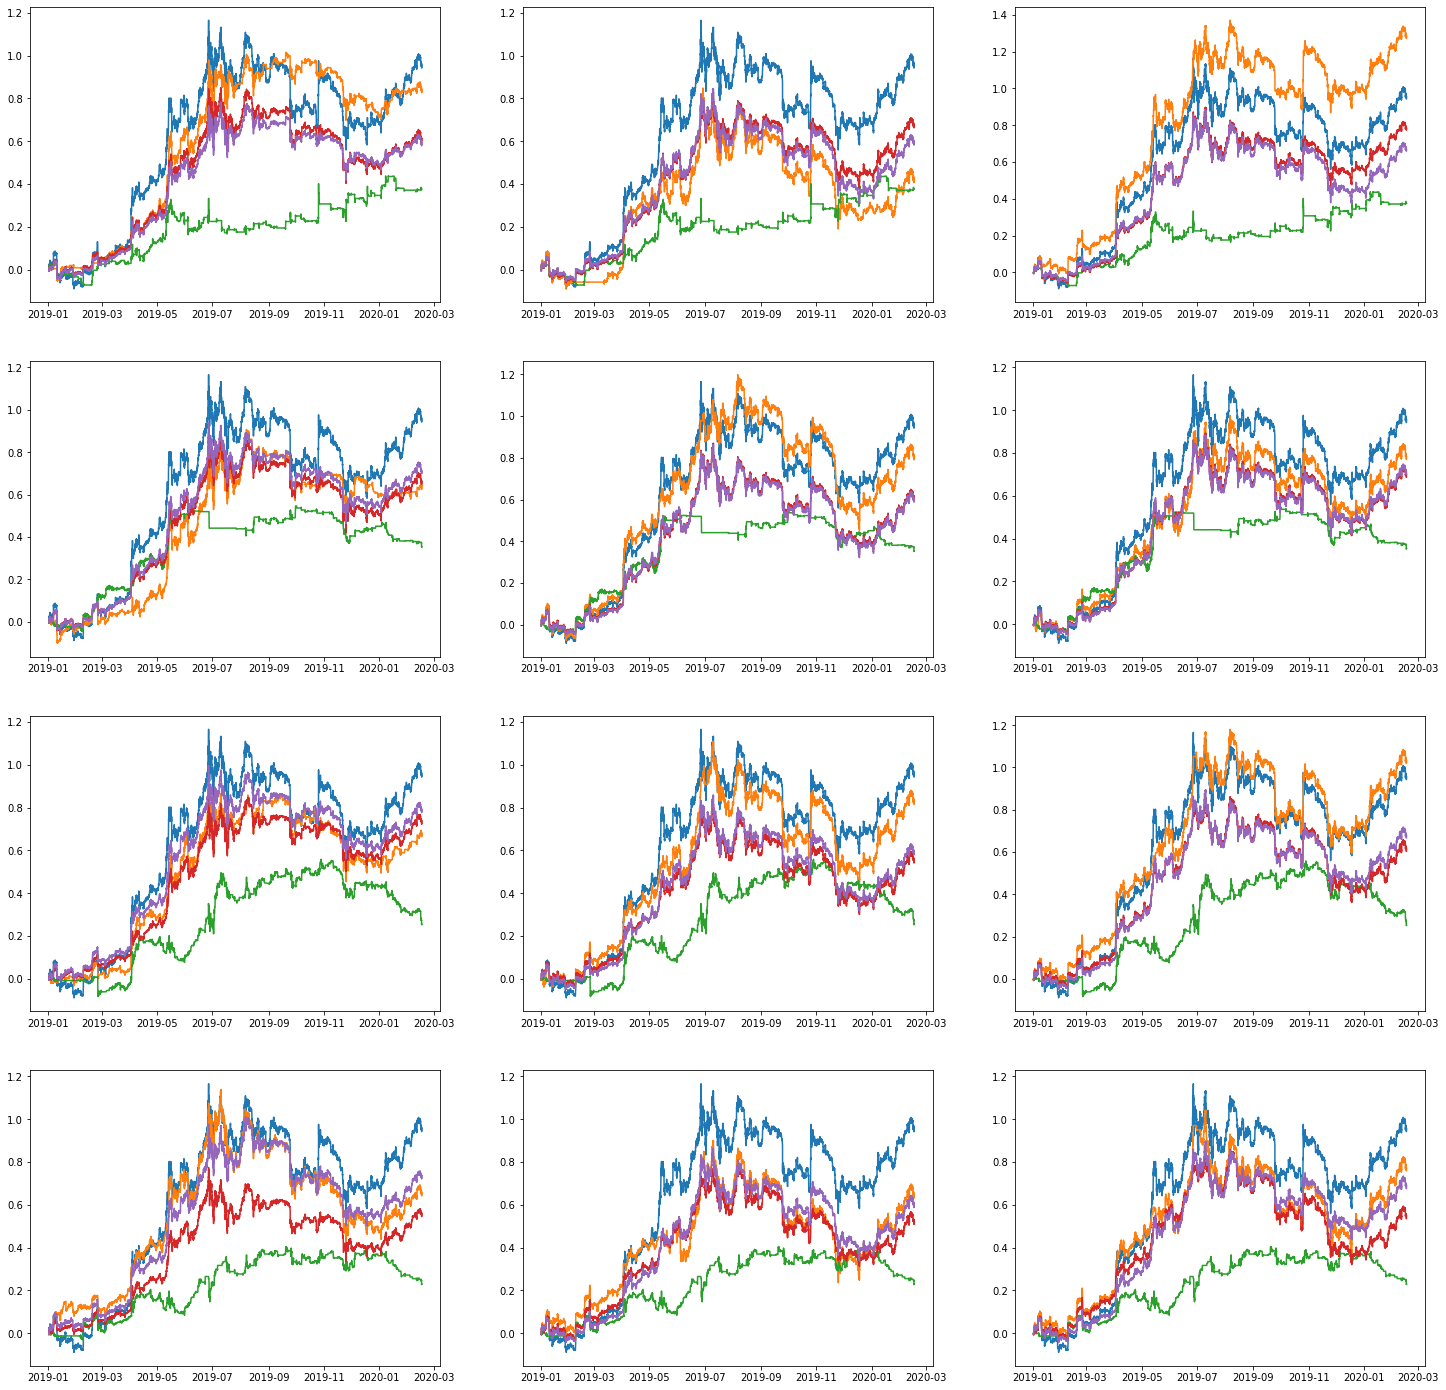

In [2]:
start = compdf.index[0]
plt_data = compdf.copy()
plt_data = plt_data.loc[start:]
end = compdf.index[-1]
plt_data = plt_data.loc[:end]


fig, axs = plt.subplots(4, 3, figsize=(25,25))
qs = qs_from_name(qs_name)
for i,q in enumerate(qs_name):
    for j,w in enumerate(ws_name):
        qw = (q, w)
        c = get_col_from_wq(qw[1], qw[0])
        axs[i,j].plot(plt_data['returns'].cumsum(), label = 'btc')
        axs[i,j].plot(plt_data[c['ret_ensemble']].cumsum(), label = 'ensemble q:%s, w:%s' % (qs[qw[0]], qw[1]))
        axs[i,j].plot(plt_data[c['ret_varspread']].cumsum(), label = 'varspread q:%s, w:%s' % (qs[qw[0]], qw[1]))
        axs[i,j].plot(plt_data[c['ret_var_norm']].cumsum(), label = 'var target norm q:%s, w:%s' % (qs[qw[0]], qw[1]))
        axs[i,j].plot(plt_data[c['ret_var_evt']].cumsum(), label = 'var target evt q:%s, w:%s' % (qs[qw[0]], qw[1]))
        if legend:
            axs[i,j].legend()
if save:
    plt.savefig('./strat_historical_perf.png', bbox_inches='tight')

# Uptrend

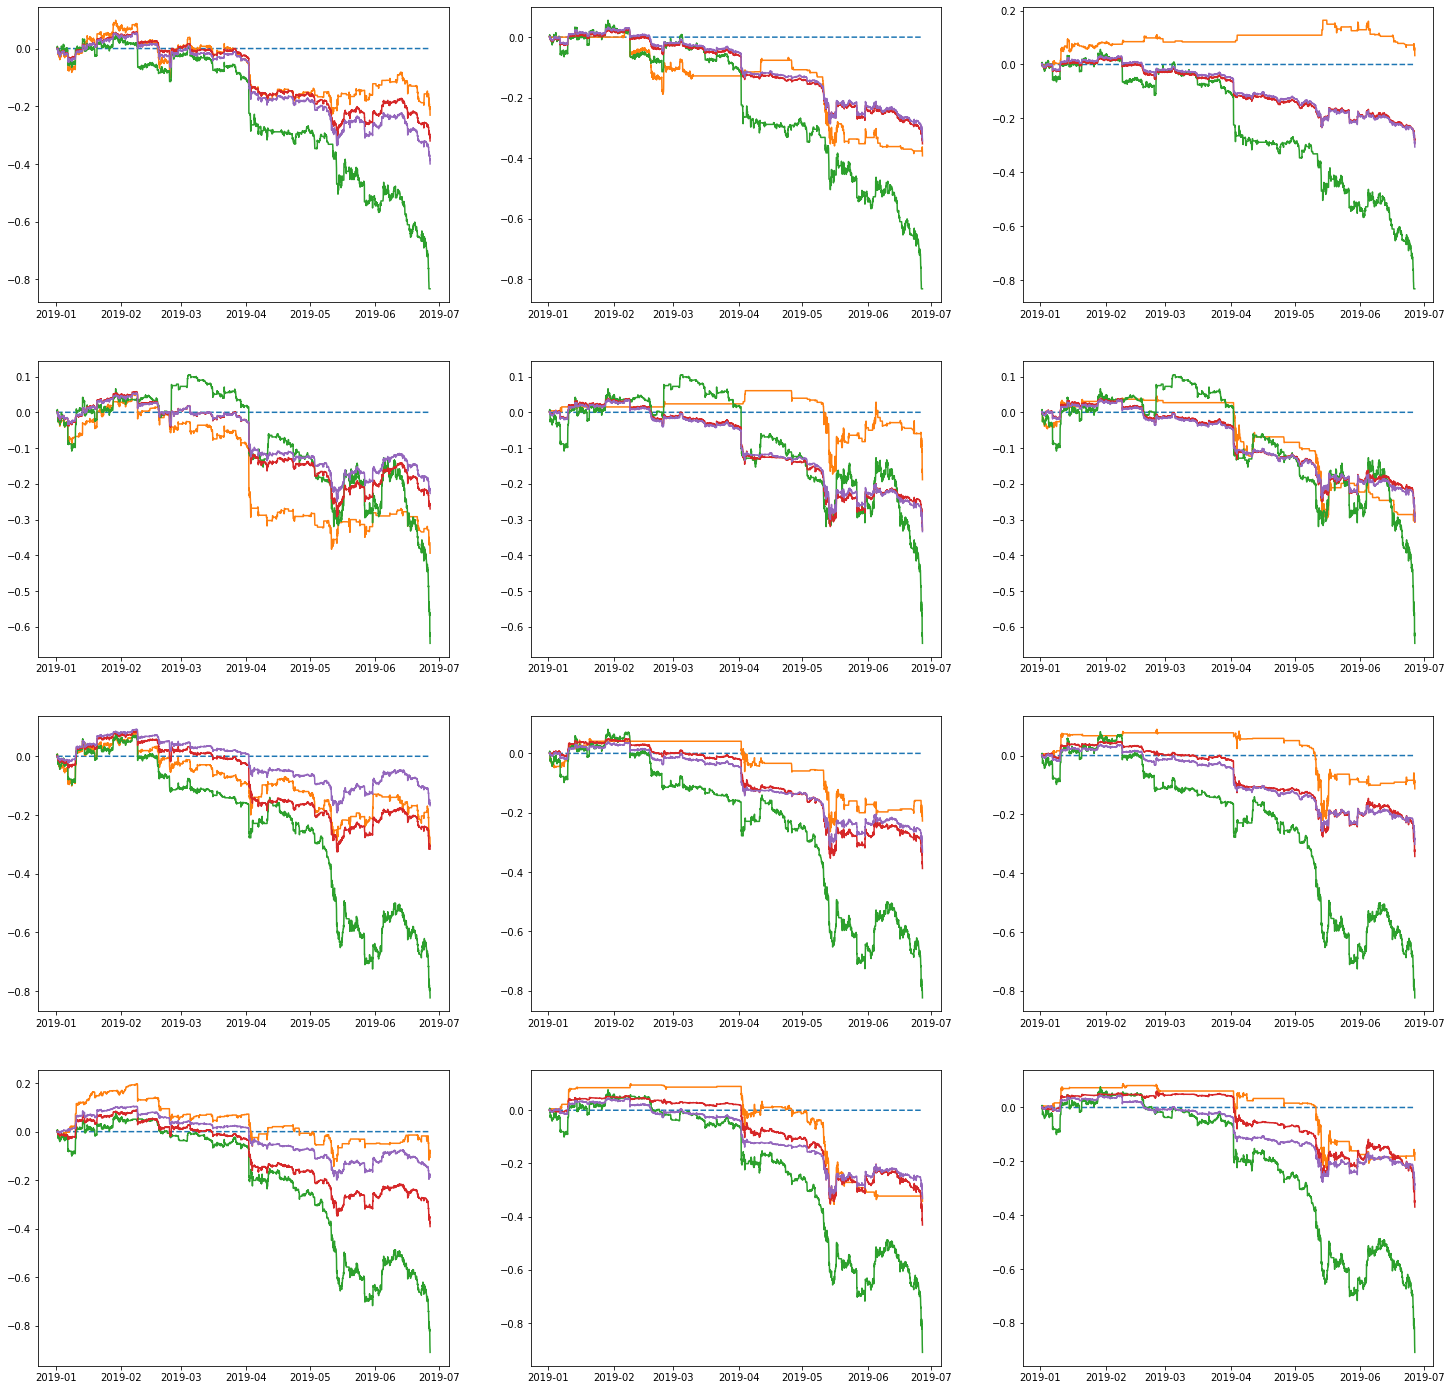

In [3]:
start = compdf.index[0]
plt_data = compdf.copy()
plt_data = plt_data.loc[start:]
end = compdf['returns'].cumsum().idxmax()
plt_data = plt_data.loc[:end]


fig, axs = plt.subplots(4, 3, figsize=(25,25))
qs = qs_from_name(qs_name)
for i,q in enumerate(qs_name):
    for j,w in enumerate(ws_name):
        qw = (q, w)
        c = get_col_from_wq(qw[1], qw[0])
        
        axs[i,j].plot(plt_data['returns'] - plt_data['returns'], '--')
        axs[i,j].plot((plt_data[c['ret_ensemble']] - plt_data['returns']).cumsum(), label = 'ensemble q:%s, w:%s' % (qs[qw[0]], qw[1]))
        axs[i,j].plot((plt_data[c['ret_varspread']] - plt_data['returns']).cumsum(), label = 'varspread q:%s, w:%s' % (qs[qw[0]], qw[1]))
        axs[i,j].plot((plt_data[c['ret_var_norm']] - plt_data['returns']).cumsum(), label = 'var target norm q:%s, w:%s' % (qs[qw[0]], qw[1]))
        axs[i,j].plot((plt_data[c['ret_var_evt']] - plt_data['returns']).cumsum(), label = 'var target evt q:%s, w:%s' % (qs[qw[0]], qw[1]))
        if legend:
            axs[i,j].legend()
if save:
    plt.savefig('./strat_excess_perf_uptrend.png', bbox_inches='tight')

# Downtrend

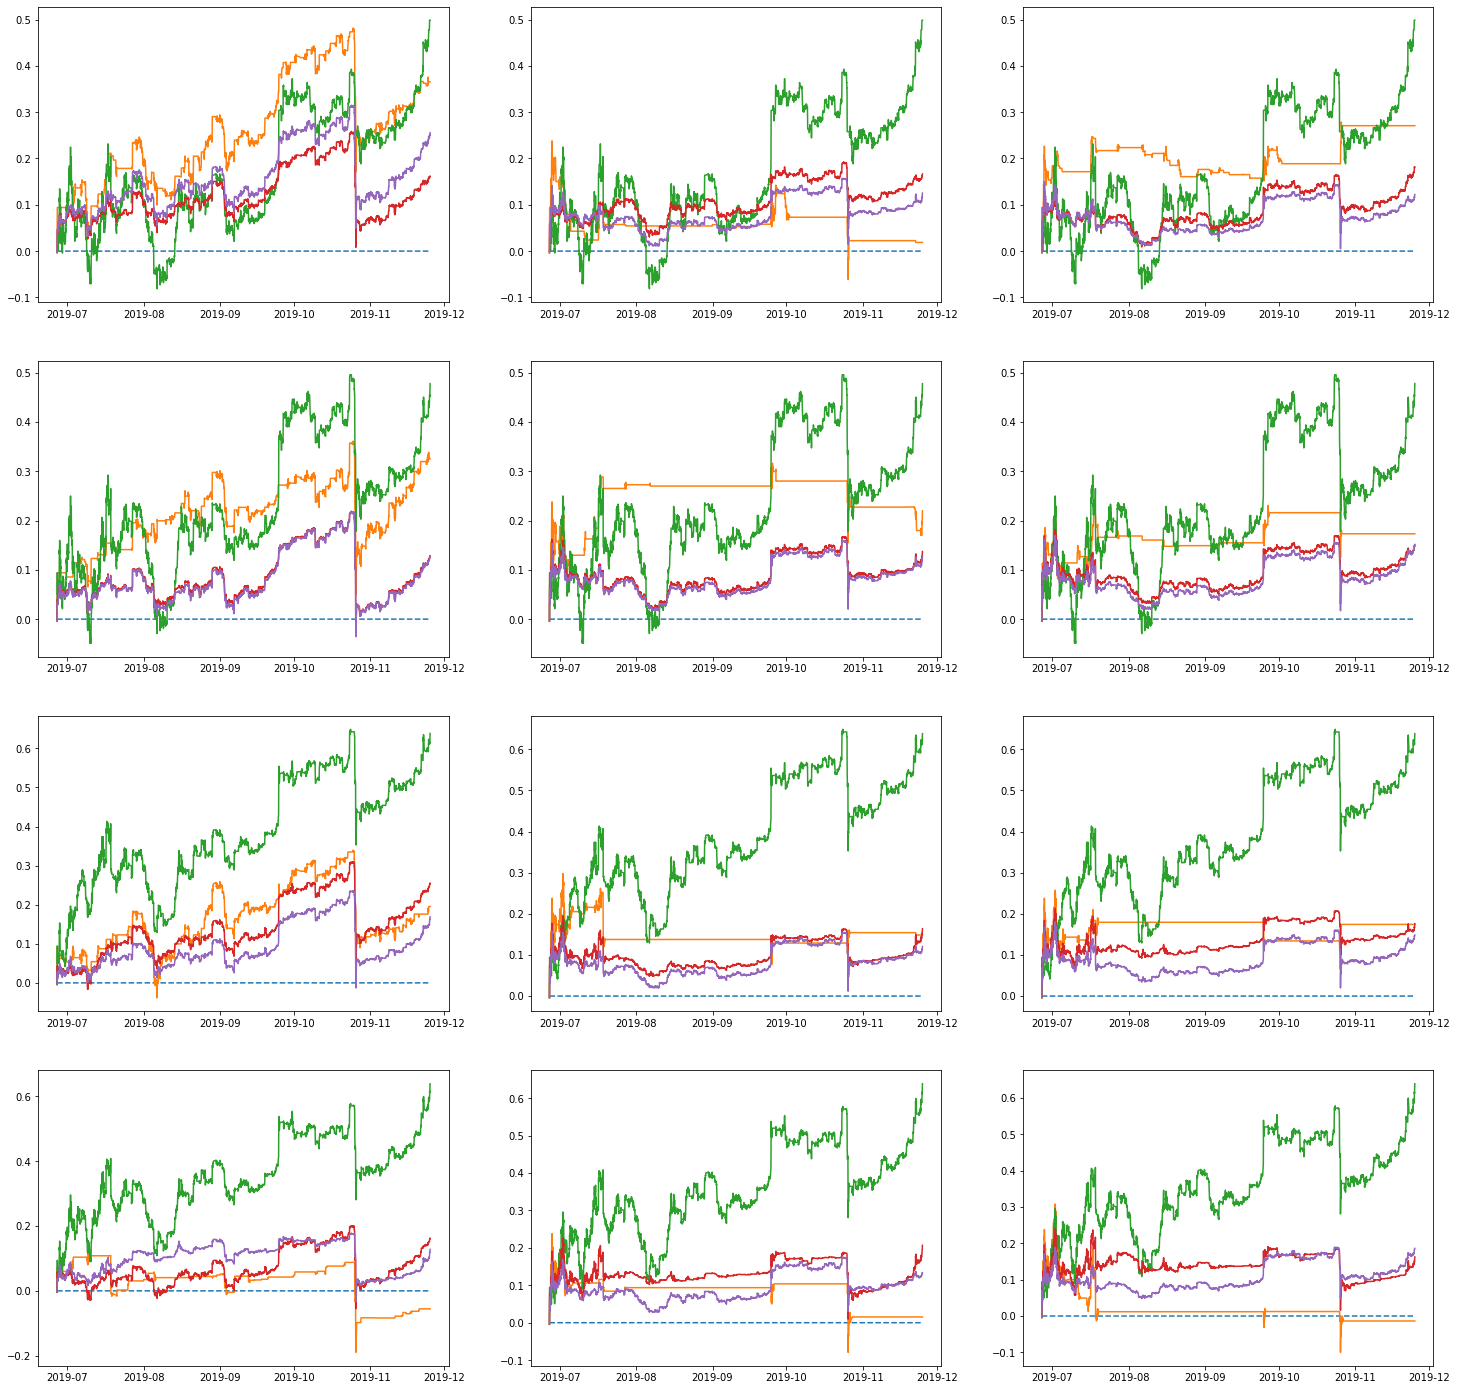

In [4]:
start = compdf['returns'].cumsum().idxmax()
plt_data = compdf.copy()
plt_data = plt_data.loc[start:]
end = plt_data['returns'].cumsum().idxmin()
plt_data = plt_data.loc[:end]


fig, axs = plt.subplots(4, 3, figsize=(25,25))
qs = qs_from_name(qs_name)
for i,q in enumerate(qs_name):
    for j,w in enumerate(ws_name):
        qw = (q, w)
        c = get_col_from_wq(qw[1], qw[0])
        
        axs[i,j].plot(plt_data['returns'] - plt_data['returns'], '--')
        axs[i,j].plot((plt_data[c['ret_ensemble']] - plt_data['returns']).cumsum(), label = 'ensemble q:%s, w:%s' % (qs[qw[0]], qw[1]))
        axs[i,j].plot((plt_data[c['ret_varspread']] - plt_data['returns']).cumsum(), label = 'varspread q:%s, w:%s' % (qs[qw[0]], qw[1]))
        axs[i,j].plot((plt_data[c['ret_var_norm']] - plt_data['returns']).cumsum(), label = 'var target norm q:%s, w:%s' % (qs[qw[0]], qw[1]))
        axs[i,j].plot((plt_data[c['ret_var_evt']] - plt_data['returns']).cumsum(), label = 'var target evt q:%s, w:%s' % (qs[qw[0]], qw[1]))
        if legend:
            axs[i,j].legend()
if save:
    plt.savefig('./strat_excess_perf_downtrend.png', bbox_inches='tight')
